In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import re


In [2]:
pd.set_option('display.max_colwidth', None)

### Read the train dataset

In [3]:
#0=non_offensive, 1=offensive
train_tweets=pd.read_csv('../data/Dataset 1/train.csv', encoding="utf-8")
train_tweets

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


In [4]:
#have 31,962 tweets in the training dataset
train_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
#count of non_offensive (0) and offensive (1) tweets
train_tweets['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [6]:
#count of tweets in terms of percentage 
#we have 92% non_offensive and 7% offensive
train_tweets['label'].value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

Text(0.5, 1.0, 'Distribution of label')

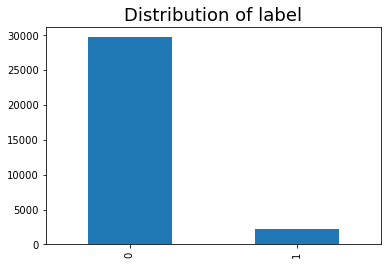

In [7]:
#plot the distribution of plots
train_tweets['label'].value_counts().plot(kind='bar')
plt.title("Distribution of label", size=18)

### Clean the tweets

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

from nltk.tokenize import TweetTokenizer
import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vahidehrasekhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def preprocess_tweet_text(tweet):
    
 # Lower the case
 tweet.lower()

 tweet = re.sub('[^A-Za-z0-9]+', ' ', tweet)

 # Remove user @ references and '#' from tweet
 tweet = re.sub(r'\@\w+|\#','', tweet)

 # Remove urls
 tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)

 # Remove punctuations
 tweet = tweet.translate(str.maketrans('', '', string.punctuation))

 #Remove the word 'user' at the begining of the sentence (occurs once or twice)
 tweet = re.sub(r'(user)', '', tweet)

 #Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
 tk = TweetTokenizer()
 tweet_tokens = tk.tokenize(tweet)

 # Remove stopwords
 filtered_words = [w for w in tweet_tokens if not w in stop_words]

 # Remove redundant terms like ‘amp’, ‘rt’, etc.
 filtered_words_final = [w for w in filtered_words if not w in ('amp', 'rt')]

 return " ".join(filtered_words_final)



In [10]:
train_tweets.tweet=train_tweets['tweet'].apply(preprocess_tweet_text)


In [11]:
train_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [12]:
train_tweets.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfunction run
1,2,0,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [13]:
#adding a new column to show length of each tweet and word count
train_tweets['length']= train_tweets['tweet'].apply(len)
train_tweets['count'] = train_tweets['tweet'].str.findall(r'(\w+)').str.len()
train_tweets.head()

,id,label,tweet,length,count
0,1,0,father dysfunctional selfish drags kids dysfunction run,55,7
1,2,0,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked,77,11
2,3,0,bihday majesty,14,2
3,4,0,model love u take u time ur,27,7
4,5,0,factsguide society motivation,29,3


In [14]:
#checking to see if we have tweets with 0 character 
train_tweets[train_tweets['length']==0]

,id,label,tweet,length,count
1961,1962,0,,0,0
3351,3352,0,,0,0
3982,3983,0,,0,0
4799,4800,0,,0,0
5028,5029,0,,0,0
5235,5236,0,,0,0
5309,5310,0,,0,0
7222,7223,0,,0,0
7939,7940,0,,0,0
9034,9035,0,,0,0


In [15]:
#replacing all 0 with nan
train_tweets['length']= train_tweets['length'].replace(0, np.nan)

#checking to make sure there is no 0 in length
train_tweets[train_tweets['length']==0]


,id,label,tweet,length,count


In [16]:
#dropping all nans
train_tweets= train_tweets.dropna(how='all', axis=0)
train_tweets

,id,label,tweet,length,count
0,1,0,father dysfunctional selfish drags kids dysfunction run,55.0,7
1,2,0,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked,77.0,11
2,3,0,bihday majesty,14.0,2
3,4,0,model love u take u time ur,27.0,7
4,5,0,factsguide society motivation,29.0,3
...,...,...,...,...,...
31957,31958,0,ate isz youuu,13.0,3
31958,31959,0,see nina turner airwaves trying wrap mantle genuine hero like shirley chisolm shame imwithher,93.0,14
31959,31960,0,listening sad songs monday morning otw work sad,47.0,8
31960,31961,1,sikh temple vandalised calgary wso condemns act,47.0,7


In [17]:
#removing tweets with 0 length (11 tweets)
train_tweets=train_tweets[train_tweets['length']>=1]
train_tweets


,id,label,tweet,length,count
0,1,0,father dysfunctional selfish drags kids dysfunction run,55.0,7
1,2,0,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked,77.0,11
2,3,0,bihday majesty,14.0,2
3,4,0,model love u take u time ur,27.0,7
4,5,0,factsguide society motivation,29.0,3
...,...,...,...,...,...
31957,31958,0,ate isz youuu,13.0,3
31958,31959,0,see nina turner airwaves trying wrap mantle genuine hero like shirley chisolm shame imwithher,93.0,14
31959,31960,0,listening sad songs monday morning otw work sad,47.0,8
31960,31961,1,sikh temple vandalised calgary wso condemns act,47.0,7


array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

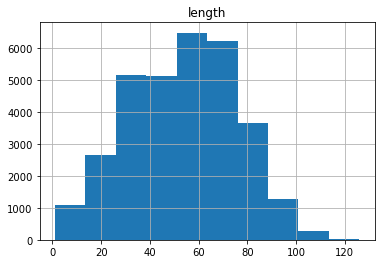

In [18]:
#plotting the distribution of length of tweets
train_tweets.hist(column='length')

In [19]:
#average tweet has 53 characters
train_tweets['length'].describe()

count    31930.000000
mean        53.399530
std         22.114556
min          1.000000
25%         36.000000
50%         55.000000
75%         70.000000
max        126.000000
Name: length, dtype: float64

In [20]:
#average word count in tweets is 7
train_tweets['count'].describe()

count    31930.000000
mean         7.909959
std          3.319934
min          1.000000
25%          5.250000
50%          8.000000
75%         10.000000
max         38.000000
Name: count, dtype: float64

In [21]:
#take a look at random tweets
print(train_tweets.loc[31900, 'tweet'])

father day deserve call dad even woman god bless


In [22]:
print(train_tweets.loc[31960, 'tweet'])

sikh temple vandalised calgary wso condemns act


In [23]:
print(train_tweets.loc[2000, 'tweet'])

goood keep going


In [24]:
#take a look at tweets that are more than 80 characters long
train_tweets[train_tweets['length']>80]

,id,label,tweet,length,count
7,8,0,next school year year exams think school exams hate imagine actorslife revolutionschool girl,92.0,13
10,11,0,ireland consumer price index mom climbed previous 0 2 0 5 may blog silver gold forex,84.0,16
11,12,0,selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love,109.0,10
14,15,1,comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins,84.0,7
20,21,0,euro 2016 people blaming ha conceded goal fat rooney gave away free kick knowing bale hit,89.0,16
...,...,...,...,...,...
31908,31909,0,dudes wana fuck eachother n get married never mad tht jus means females damn 50 orlando omg 50 gay,98.0,19
31931,31932,0,c sociopaths low iq satanic everything abomination 2 god b norm well committing a1 felonies,91.0,15
31949,31950,0,hear one new songs go katie ellie youtube original music song relationship songwriter,85.0,13
31953,31954,0,good morning instagram shower water berlin berlincitygirl girl newyork z rich genf bern,87.0,13


In [25]:
print(train_tweets.loc[11, 'tweet'])

selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love


In [26]:
#tweets with 1 word
train_tweets[train_tweets['count']==1]

,id,label,tweet,length,count
172,173,0,gloucesterrugby,15.0,1
502,503,0,ending,6.0,1
506,507,0,im,2.0,1
625,626,0,answer,6.0,1
650,651,0,congrats,8.0,1
...,...,...,...,...,...
31833,31834,0,ferry,5.0,1
31905,31906,0,love,4.0,1
31911,31912,0,choose,6.0,1
31925,31926,0,afternoon,9.0,1


### Looking at tweets that are offensive and non_offensive

In [27]:
offensive_tweets=train_tweets[train_tweets['label']==1]
offensive_tweets

,id,label,tweet,length,count
13,14,1,cnn calls michigan middle school build wall chant tcot,54.0,9
14,15,1,comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins,84.0,7
17,18,1,retweet agree,13.0,2
23,24,1,lumpy says prove lumpy,22.0,4
34,35,1,unbelievable 21st century need something like neverump xenophobia,65.0,8
...,...,...,...,...,...
31934,31935,1,lady banned kentucky mall jcpenny kentucky,42.0,6
31946,31947,1,omfg offended mailbox proud mailboxpride liberalisme,52.0,6
31947,31948,1,balls hashtag say weasel away lumpy tony dipshit,48.0,8
31948,31949,1,makes ask anybody god oh thank god,34.0,7


In [28]:
non_offensive_tweets=train_tweets[train_tweets['label']==0]
non_offensive_tweets

,id,label,tweet,length,count
0,1,0,father dysfunctional selfish drags kids dysfunction run,55.0,7
1,2,0,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked,77.0,11
2,3,0,bihday majesty,14.0,2
3,4,0,model love u take u time ur,27.0,7
4,5,0,factsguide society motivation,29.0,3
...,...,...,...,...,...
31956,31957,0,fishing tomorrow carnt wait first time 2 years,46.0,8
31957,31958,0,ate isz youuu,13.0,3
31958,31959,0,see nina turner airwaves trying wrap mantle genuine hero like shirley chisolm shame imwithher,93.0,14
31959,31960,0,listening sad songs monday morning otw work sad,47.0,8


In [29]:
offensive_tweets['length'].describe()
#offensive_tweets['count'].describe()


count    2238.000000
mean       57.685880
std        20.744914
min         4.000000
25%        42.000000
50%        59.000000
75%        72.750000
max       119.000000
Name: length, dtype: float64

In [30]:
non_offensive_tweets['length'].describe()
#non_offensive_tweets['count'].describe()

count    29692.000000
mean        53.076452
std         22.181154
min          1.000000
25%         36.000000
50%         54.000000
75%         70.000000
max        126.000000
Name: length, dtype: float64

In [31]:
#checking the longest offensive tweet
offensive_tweets[offensive_tweets['length']==119]

,id,label,tweet,length,count
2784,2785,1,happy newyear sameshitnewyear corruption trump terrorattack fundamentalism violence isis crisis hatred murder terrorism,119.0,13


In [32]:
#checking the longest non_offensive tweet
non_offensive_tweets[non_offensive_tweets['length']==126]

,id,label,tweet,length,count
22911,22912,0,hititonthehead killarypeople needtoreallyreadaboutherbackgroundevenifitsonlyfor 08compare shegotworseithink butbadfromthegetgo,126.0,6


### Find most commonly used terms in (non)offensive_tweets

In [33]:
#load Punkt sentence tokenizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vahidehrasekhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
#tokenize each tweet 
offensive_single_tokenized = [nltk.tokenize.word_tokenize(i) for i in train_tweets.tweet]
len(offensive_single_tokenized)

31930

In [35]:
print(offensive_single_tokenized[1])

['thanks', 'lyft', 'credit', 'use', 'cause', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked']


In [36]:
print(offensive_single_tokenized[35])

['taylorswift', '1989', 'bull', 'dominate', 'bull', 'direct', 'whatever', 'want', 'w']


In [37]:
# tokenize the text into a list of words
def token_text(text):
 tokens = nltk.tokenize.word_tokenize(text)
 return tokens

In [38]:
#common words in offensive_tweets 

tokenized_large = []
# Iterating over each string in data
for x in offensive_tweets['tweet']:
 # Calliing preprocess text function
 token = token_text(x)
 tokenized_large.append(token)
offensive_tokeninized_final = [i for j in tokenized_large for i in j]

In [39]:
len(offensive_tokeninized_final)

18226

In [40]:
print(offensive_tokeninized_final[10])

australia


In [42]:
# Use the counter and find the 10 most common terms in offensive tweets
from collections import Counter

most_common_words= [word for word, word_count in Counter(offensive_tokeninized_final).most_common(20)]
print(most_common_words)

#'sjw'='social justice warrior'
#'Allahsoil'= 'Allah's oil' a book about Mideat Petrolum published in 1977
#'libtard'= 'a contemptuous term for a person with left-wing political views.'

['trump', 'libtard', 'white', 'like', 'black', 'racist', 'politics', 'people', 'allahsoil', 'liberal', 'women', 'might', 'sjw', 'obama', 'hate', 'new', 'retweet', 'racism', '2016', 'us']


In [43]:
#common words in non_offensive tweets

tokenized_large = []
# Iterating over each string in data
for x in non_offensive_tweets['tweet']:
 # Calliing preprocess text function
 token = token_text(x)
 tokenized_large.append(token)
non_offensive_tokeninized_final = [i for j in tokenized_large for i in j]

In [44]:
len(non_offensive_tokeninized_final)

234659

In [45]:
# Use the counter and find the 10 most common terms in non_offensive tweets

from collections import Counter

most_common_words= [word for word, word_count in Counter(non_offensive_tokeninized_final).most_common(20)]
print(most_common_words)

['love', 'day', 'happy', 'life', 'u', 'time', 'today', 'like', 'thankful', 'positive', 'new', 'get', 'bihday', 'good', 'people', 'one', 'smile', 'see', 'father', 'go']


### Saving cleaned up train_tweets

In [46]:
train_tweets.to_csv('clean_train_tweets.csv', index=False)

In [47]:
#checking to make sure everything looks good
cleaned_train_tweets=pd.read_csv('../data/Dataset 1/clean_train_tweets.csv')
cleaned_train_tweets

,id,label,tweet,length,count
0,1,0,father dysfunctional selfish drags kids dysfunction run,55.0,7
1,2,0,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked,77.0,11
2,3,0,bihday majesty,14.0,2
3,4,0,model love u take u time ur,27.0,7
4,5,0,factsguide society motivation,29.0,3
...,...,...,...,...,...
31925,31958,0,ate isz youuu,13.0,3
31926,31959,0,see nina turner airwaves trying wrap mantle genuine hero like shirley chisolm shame imwithher,93.0,14
31927,31960,0,listening sad songs monday morning otw work sad,47.0,8
31928,31961,1,sikh temple vandalised calgary wso condemns act,47.0,7


### Loading test_tweets to clean them up

In [48]:
test_tweets=pd.read_csv('../data/Dataset 1/test_tweets.csv', encoding="utf-8")
test_tweets

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"
...,...,...
17192,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
17193,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
17194,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
17195,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"


In [49]:
#we had defined 'preprocess_tweet_text' earlier so we can apply it on test_tweets
test_tweets.tweet=test_tweets['tweet'].apply(preprocess_tweet_text)


In [50]:
test_tweets

,id,tweet
0,31963,studiolife aislife requires passion dedication willpower find newmaterials
1,31964,white supremacists want everyone see new birds movie
2,31965,safe ways heal acne altwaystoheal healthy healing
3,31966,hp cursed child book reservations already yes harrypotter pottermore favorite
4,31967,3rd bihday amazing hilarious nephew eli ahmir uncle dave loves misses
...,...,...
17192,49155,thought factory left right polarisation trump uselections 2016 leadership politics brexit blm gt 3
17193,49156,feeling like mermaid hairflip neverready formal wedding gown dresses mermaid
17194,49157,hillary campaigned today ohio omg used words like assets liability never clinton say thee word radicalization
17195,49158,happy work conference right mindset leads culture development organizations work mindset


In [51]:
#have 17,197 test itme 
test_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [52]:
#lets add character length/word count columns 
test_tweets['length']= test_tweets['tweet'].apply(len)
test_tweets['count'] = test_tweets['tweet'].str.findall(r'(\w+)').str.len()
test_tweets.head()

,id,tweet,length,count
0,31963,studiolife aislife requires passion dedication willpower find newmaterials,74,8
1,31964,white supremacists want everyone see new birds movie,52,8
2,31965,safe ways heal acne altwaystoheal healthy healing,49,7
3,31966,hp cursed child book reservations already yes harrypotter pottermore favorite,77,10
4,31967,3rd bihday amazing hilarious nephew eli ahmir uncle dave loves misses,69,11


In [53]:
#checking to see if we have 0 character in a tweet
test_tweets[test_tweets['length']==0]

,id,tweet,length,count
933,32896,,0,0
2425,34388,,0,0
2772,34735,,0,0
3904,35867,,0,0
4157,36120,,0,0
4187,36150,,0,0
4575,36538,,0,0
5957,37920,,0,0
6127,38090,,0,0
6384,38347,,0,0


In [54]:
#removing tweets with 0 length (26 tweets)
test_tweets=test_tweets[test_tweets['length']>1]
test_tweets

,id,tweet,length,count
0,31963,studiolife aislife requires passion dedication willpower find newmaterials,74,8
1,31964,white supremacists want everyone see new birds movie,52,8
2,31965,safe ways heal acne altwaystoheal healthy healing,49,7
3,31966,hp cursed child book reservations already yes harrypotter pottermore favorite,77,10
4,31967,3rd bihday amazing hilarious nephew eli ahmir uncle dave loves misses,69,11
...,...,...,...,...
17192,49155,thought factory left right polarisation trump uselections 2016 leadership politics brexit blm gt 3,98,14
17193,49156,feeling like mermaid hairflip neverready formal wedding gown dresses mermaid,76,10
17194,49157,hillary campaigned today ohio omg used words like assets liability never clinton say thee word radicalization,109,16
17195,49158,happy work conference right mindset leads culture development organizations work mindset,88,11


In [55]:
#double checking to ensure all 0 character tweets are removed
test_tweets[test_tweets['length']==0]

,id,tweet,length,count


In [56]:
#average test tweet is 53 character long 
test_tweets['length'].describe()

count    17171.000000
mean        53.359385
std         22.195763
min          2.000000
25%         36.000000
50%         55.000000
75%         70.000000
max        123.000000
Name: length, dtype: float64

In [57]:
#checking the longest tweet
test_tweets[test_tweets['length']==123]

,id,tweet,length,count
2841,34804,golden state warriors vs cleveland cavaliers 108 97 warriors leads 3 1 nbaplayoffs 2016 final game 4 gsvscle nooon les cavs,123,21


In [58]:
test_tweets[test_tweets['length']==70]

,id,tweet,length,count
33,31996,suppo taiji fisherman bullying racism tweet 4taiji thecove seashepherd,70,9
50,32013,enjoying sunshine god good orlando sunshinestate goodlife bosslady joy,70,9
77,32040,cool old door window 50 00 vendor 509 shoplocal shopalyssas fathersday,70,11
86,32049,stardivarius friday new history new outfit post fashion look friendsfl,70,10
424,32387,weekends sho amazing time friends family summerishere lovedthisweekend,70,8
...,...,...,...,...
16800,48763,disabled journalist rich jews mexican rapists joke presidency pathetic,70,9
16871,48834,looking forward festival ticket deichbrand germany cuxhaven rock metal,70,9
16890,48853,time enjoy selfie selfie tagsforlikes instalike instafollower enjoying,70,8
16975,48938,moment realise life candycrush 1000 omg wtf touredaist makecandycrusha,70,9


In [59]:
#common words in test tweets

tokenized_large = []
# Iterating over each string in data
for x in test_tweets['tweet']:
 # Calliing preprocess text function
 token = token_text(x)
 tokenized_large.append(token)
test_tokeninized_final = [i for j in tokenized_large for i in j]

In [60]:
len(test_tokeninized_final)

135564

In [61]:
# Use the counter and find the 10 most common terms in test tweets

from collections import Counter

most_common_words= [word for word, word_count in Counter(test_tokeninized_final).most_common(20)]
print(most_common_words)

['love', 'day', 'happy', 'u', 'time', 'life', 'today', 'new', 'like', 'get', 'positive', 'thankful', 'bihday', 'people', 'good', 'one', '2016', 'see', 'smile', '2']


### Saving cleaned up test_tweets

In [62]:
test_tweets.to_csv('clean_test_tweets.csv', index=False)

In [63]:
#checking to make sure everything looks good
cleaned_test_tweets=pd.read_csv('../data/Dataset 1/clean_test_tweets.csv')
cleaned_test_tweets

,id,tweet,length,count
0,31963,studiolife aislife requires passion dedication willpower find newmaterials,74,8
1,31964,white supremacists want everyone see new birds movie,52,8
2,31965,safe ways heal acne altwaystoheal healthy healing,49,7
3,31966,hp cursed child book reservations already yes harrypotter pottermore favorite,77,10
4,31967,3rd bihday amazing hilarious nephew eli ahmir uncle dave loves misses,69,11
...,...,...,...,...
17166,49155,thought factory left right polarisation trump uselections 2016 leadership politics brexit blm gt 3,98,14
17167,49156,feeling like mermaid hairflip neverready formal wedding gown dresses mermaid,76,10
17168,49157,hillary campaigned today ohio omg used words like assets liability never clinton say thee word radicalization,109,16
17169,49158,happy work conference right mindset leads culture development organizations work mindset,88,11
